In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import PIL
import math

In [2]:
maydanoz = mpimg.imread('maydanoz.jpg') / 255.0
yüz = mpimg.imread('yüz.jpg') / 255.0
noise = np.random.rand(945, 945)

In [3]:
70+946

1016

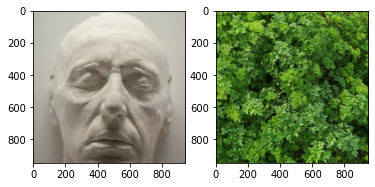

In [4]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(yüz[70:1016, 70:1016])
axes[1].imshow(maydanoz[:946, :946])

In [5]:
print(maydanoz.shape)
print(yüz.shape)

(1139, 1080, 3)
(1209, 1080, 3)


In [6]:
maydanoz_r = maydanoz[:945, :945]
yüz_r = yüz[70:1015 ,70:1015]

In [7]:
yüz_r.shape

(945, 945, 3)

In [8]:
horizontal33_sobel = np.array([-1, -2, -1, 
                               0, 0, 0,
                               1, 2, 1]).reshape(3, 3)
vertical33_sobel = np.array([-1, 0, 1,
                             -2, 0, 2,
                             -1, 0, 1]).reshape(3, 3)
horizontal55_sobel = np.array([2, 2, 4, 2, 2,
                              1, 1, 2, 1, 1,
                              0, 0, 0, 0, 0,
                              -1, -1, -2, -1, -1,
                              -2, -2, -4, -2, -2]).reshape(5, 5)
vertical55_sobel = horizontal55_sobel.T

horizontal77_sobel = np.array([4, 4, 4, 8, 4, 4, 4,
                              2, 2, 2, 4, 2, 2, 2,
                              1, 1, 1, 2, 1, 1, 1,
                              0, 0, 0, 0, 0, 0, 0,
                              -1, -1, -1, -2, -1, -1, -1,
                              -2, -2, -2, -4, -2, -2, -2,
                              -4, -4, -4, -8, -4, -4, -4]).reshape(7, 7)
vertical77_sobel = horizontal77_sobel.T

In [9]:
def edge_extraction_sobel(image, horizontal, vertical, color=None):
    
    if color is None:
        image = image
    else:
        image = image[:, :, color]
    
    h = horizontal.shape[0]
    v = vertical.shape[1]
    
    convolution_matrix = np.zeros(((image.shape[0] // h), 
                                   (image.shape[1] // h)))
        
    for i in range(0, convolution_matrix.shape[0]):
        for d in range(0, convolution_matrix.shape[1]):
            convolution_horizontal = (image[0+h*i:h+h*i,
                                          0+h*d:h+h*d] * horizontal).sum()
            
            convolution_vertical = (image[0+v*i:v+v*i,
                                        0+v*d:v+v*d] * vertical).sum()
            
            convolution_matrix[i, d] += (convolution_vertical**2 + convolution_horizontal**2)**(1/2)
            
    return convolution_matrix

In [19]:
yüz_r33 = edge_extraction_sobel(yüz_r, horizontal33_sobel, vertical33_sobel, color=0)
yüz_g33 = edge_extraction_sobel(yüz_r, horizontal33_sobel, vertical33_sobel, color=1)
yüz_b33 = edge_extraction_sobel(yüz_r, horizontal33_sobel, vertical33_sobel, color=2)
yüz_r55 = edge_extraction_sobel(yüz_r, horizontal55_sobel, vertical55_sobel, color=0)
yüz_g55 = edge_extraction_sobel(yüz_r, horizontal55_sobel, vertical55_sobel, color=1)
yüz_b55 = edge_extraction_sobel(yüz_r, horizontal55_sobel, vertical55_sobel, color=2)
yüz_r77 = edge_extraction_sobel(yüz_r, horizontal77_sobel, vertical77_sobel, color=0)
yüz_g77 = edge_extraction_sobel(yüz_r, horizontal77_sobel, vertical77_sobel, color=1)
yüz_b77 = edge_extraction_sobel(yüz_r, horizontal77_sobel, vertical77_sobel, color=2)

In [20]:
maydanoz_r33 = edge_extraction_sobel(maydanoz_r, horizontal33_sobel, vertical33_sobel, color=0)
maydanoz_g33 = edge_extraction_sobel(maydanoz_r, horizontal33_sobel, vertical33_sobel, color=1)
maydanoz_b33 = edge_extraction_sobel(maydanoz_r, horizontal33_sobel, vertical33_sobel, color=2)
maydanoz_r55 = edge_extraction_sobel(maydanoz_r, horizontal55_sobel, vertical55_sobel, color=0)
maydanoz_g55 = edge_extraction_sobel(maydanoz_r, horizontal55_sobel, vertical55_sobel, color=1)
maydanoz_b55 = edge_extraction_sobel(maydanoz_r, horizontal55_sobel, vertical55_sobel, color=2)
maydanoz_r77 = edge_extraction_sobel(maydanoz_r, horizontal77_sobel, vertical77_sobel, color=0)
maydanoz_g77 = edge_extraction_sobel(maydanoz_r, horizontal77_sobel, vertical77_sobel, color=1)
maydanoz_b77 = edge_extraction_sobel(maydanoz_r, horizontal77_sobel, vertical77_sobel, color=2)

In [12]:
noise_r33 = edge_extraction_sobel(noise, horizontal33_sobel, vertical33_sobel)
noise_g33 = edge_extraction_sobel(noise, horizontal33_sobel, vertical33_sobel)
noise_b33 = edge_extraction_sobel(noise, horizontal33_sobel, vertical33_sobel)
noise_r55 = edge_extraction_sobel(noise, horizontal55_sobel, vertical55_sobel)
noise_g55 = edge_extraction_sobel(noise, horizontal55_sobel, vertical55_sobel)
noise_b55 = edge_extraction_sobel(noise, horizontal55_sobel, vertical55_sobel)
noise_r77 = edge_extraction_sobel(noise, horizontal77_sobel, vertical77_sobel)
noise_g77 = edge_extraction_sobel(noise, horizontal77_sobel, vertical77_sobel)
noise_b77 = edge_extraction_sobel(noise, horizontal77_sobel, vertical77_sobel)

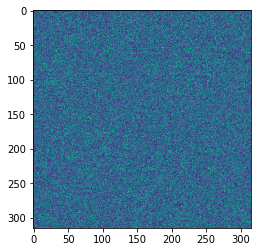

In [13]:
plt.imshow(noise_r33)

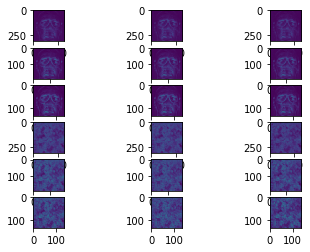

In [21]:
fig, axes = plt.subplots(6, 3)
axes[0, 0].imshow(yüz_r33)
axes[0, 1].imshow(yüz_g33)
axes[0, 2].imshow(yüz_b33)
axes[1, 0].imshow(yüz_r55)
axes[1, 1].imshow(yüz_g55)
axes[1, 2].imshow(yüz_b55)
axes[2, 0].imshow(yüz_r77)
axes[2, 1].imshow(yüz_g77)
axes[2, 2].imshow(yüz_b77)
axes[3, 0].imshow(maydanoz_r33)
axes[3, 1].imshow(maydanoz_g33)
axes[3, 2].imshow(maydanoz_b33)
axes[4, 0].imshow(maydanoz_r55)
axes[4, 1].imshow(maydanoz_g55)
axes[4, 2].imshow(maydanoz_b55)
axes[5, 0].imshow(maydanoz_r77)
axes[5, 1].imshow(maydanoz_g77)
axes[5, 2].imshow(maydanoz_b77)

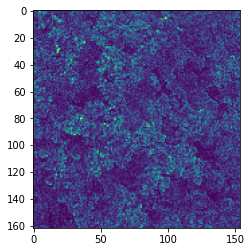

In [15]:
plt.imshow(maydanoz_b77)

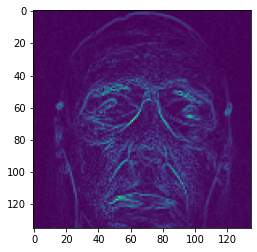

In [22]:
plt.imshow(yüz_b77)

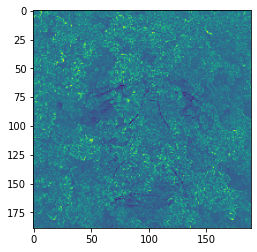

In [27]:
plt.imshow(-yüz_b55+maydanoz_b55)

In [36]:
def merger(content, style):
    matrix = np.zeros(((content.shape[0]), 
                       (content.shape[1])))
    for i in range(content.shape[0]):
        for d in range(content.shape[1]):
            if content[i, d] > 0:
                matrix[i, d] += 1/2 * (style[i, d]-content[i, d])**2
            else:
                continue
    return matrix
                

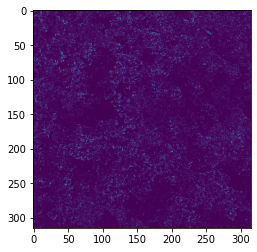

In [37]:
deneme = merger(yüz_b33, maydanoz_b33)
plt.imshow(deneme)